# importing and loading data

In [1]:
from my_imports import *
import stanTools
from sklearn import mixture
from collections import Counter
import copy
from copy import deepcopy
import os


import matplotlib.pyplot as plt
import matplotlib as mpl
# to use  my own stylimport matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}
avb_contrast_cols = {
    'p': '#C17EFF',
    'g': '#75C26A'
}
plt.style.use('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')




/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
plot_out= '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/processing/'

bayes_pin_raw = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/raw/'
bayes_pin_log2 = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/log2/'


# of nontoxic mutants in all concentrations 839
# of toxin mutants that are toxic in all conditions: 311
# of nontoxic mutants in all concentrations 855
# of toxin mutants that are toxic in all conditions: 781
len of mt_toxins: 310
len of ta_toxins 781
15
15
30
37


2012_load_data.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muts_mt_wt_toxin['t_pos_pdb'] = df_muts_mt_wt_toxin.t_mut.str[1:-1].astype(int) +1
2012_load_data.py:737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr['at_mut'] = [at] * len(df_curr)


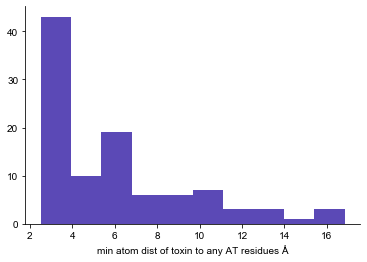

In [13]:
%run -i 2012_load_data.py

In [4]:
%run -i 2103_read_ec_files.py

added so many missing rows to df_longrange 736
added so many missing rows to df_longrange 729
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 806
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 751
added so many missing rows to df_longrange 810
1389.0


/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_inter'] = tp_inter
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1467: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_mono1'] = tp_mono1
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

1390.0
1197.0
1189.0
1140.0
1047.0
915.0
1410.0
1198.0
1410.0
1198.0
added so many missing rows to df_longrange 806
915.0


# define nonspec spec colors

In [5]:
spec_col = '#8338ec'
non_spec_col = '#fb5607'

# fig 3

In [6]:
# to check that both ways give the same number of mutants
df_merge_all_mt_l_1.shape
df_most_toxic_l = df_doubles_d_l.loc[(df_doubles_d_l.neg_log_p_tail > 9) & (df_doubles_d_l.mean_fit >0.5)]
df_most_toxic_l.shape

(51, 8)

## fig 3F

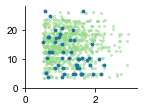

In [7]:
# for all deleterious mutations

importlib.reload(pt)
# ta toxins
df_doub_del = df_doubles_d_l_ta.loc[df_doubles_d_l_ta.at_mut.isin(del_at_low05)]
df_doub_del_sig = df_doub_del.loc[(df_doub_del.neg_log_p_tail > 9) & (df_doub_del.mean_fit >0.5)]
#most toxic toxins
df_mt_del = df_doubles_d_l.loc[df_doubles_d_l.at_mut.isin(del_at_low05)]
df_mt_del_sig = df_mt_del.loc[(df_mt_del.neg_log_p_tail > 9) &(df_mt_del.mean_fit >0.5)]

pt.plot_d_vs_effect_bayes(df_doub_del_sig, df_mt_del_sig, xlim=[0,3.2],ylim=[0,28],    
                          labeling=False,
                          col_ta = '#99d98c',
                          col_mt = '#1a759f',
                          figsize=(2,1.5),       
                          s_mt=8,
                          s_ta=4,
                          fout= plot_out + 'scatter_d_efx_low_all.svg')


## fig 3D W59T histogram


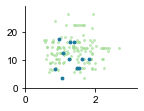

In [8]:
# for w59t
importlib.reload(pt)
# ta toxins
df_doubles_d_l_ta_w59t = df_doubles_d_l_ta.loc[df_doubles_d_l_ta.at_mut == 'W59T']
d_doubles_d_sig_l_w59t = df_doubles_d_l_ta_w59t.loc[(df_doubles_d_l_ta_w59t.neg_log_p_tail > 9) &(df_doubles_d_l_ta_w59t.mean_fit >0/5)]
#most toxic toxins
df_doubles_d_l_w59t = df_doubles_d_l.loc[df_doubles_d_l.at_mut == 'W59T']
df_most_toxic_l_w59t = df_doubles_d_l_w59t.loc[(df_doubles_d_l_w59t.neg_log_p_tail > 9) &(df_doubles_d_l_w59t.mean_fit >0.5)]

pt.plot_d_vs_effect_bayes(d_doubles_d_sig_l_w59t, df_most_toxic_l_w59t, xlim=[0,3.2],ylim=[0,29], 
                          labeling=False,
                          col_ta = '#99d98c',
                          col_mt = '#1a759f',
                          figsize=(2,1.5),
                            s_mt=8,
                          s_ta=4,
                          fout= plot_out + 'scatter_d_efx_low_all_w59T.svg')


# suppl fig individual scatter rescue

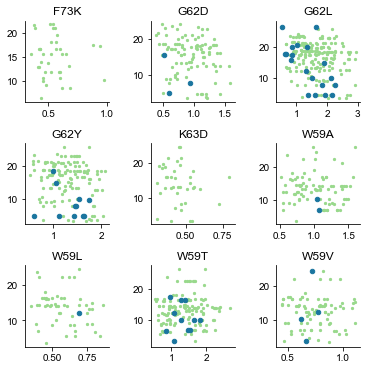

In [81]:
# for all deleterious antitoxins
n= len(del_at_low05)
n_rows = int(np.ceil(np.sqrt(n)))
n_cols = n_rows

fig = plt.figure(figsize=(2 * n_cols, 2 * n_rows))
gs = gridspec.GridSpec(n_rows, n_cols)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

    
# ta toxins
for i in range(n):
    at=del_at_low05[i]
    # fetch toxic toxins df
    df_doubles_d_l_ta_curr = df_doubles_d_l_ta.loc[df_doubles_d_l_ta.at_mut == at]
    d_doubles_d_sig_l_curr = df_doubles_d_l_ta_curr.loc[(df_doubles_d_l_ta_curr.neg_log_p_tail > 9) &(df_doubles_d_l_ta_curr.mean_fit >0/5)]
    #most toxic toxins
    df_doubles_d_l_curr = df_doubles_d_l.loc[df_doubles_d_l.at_mut == at]
    df_most_toxic_l_curr = df_doubles_d_l_curr.loc[(df_doubles_d_l_curr.neg_log_p_tail > 9) &(df_doubles_d_l_curr.mean_fit >0.5)]
    

    ax = plt.subplot(gs[i])

    #ta
    ax.scatter(d_doubles_d_sig_l_curr.mean_fit,d_doubles_d_sig_l_curr.min_atom_d, color='#99d98c', s=5)
    #mt
    ax.scatter(df_most_toxic_l_curr.mean_fit,df_most_toxic_l_curr.min_atom_d, color='#1a759f', s=20)
    plt.title(at)
    
plt.savefig(plot_out + 'scatter_all_at_low_toxin_high_at.svg', format='svg')

## fig 3B w59T histograms

2033 305 774


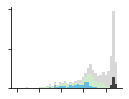

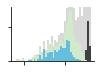

In [105]:
# w59t histogram
df_w59t = df_all_doubles_l['W59T_mean_fit']
df_w59t_mt = df_w59t.loc[df_w59t.index.isin(mt_toxins)]
df_w59t_ta = df_w59t.loc[df_w59t.index.isin(ta_toxins)]
df_w59t_stop = df_w59t.loc[df_w59t.index.str[-1]=='_']
print(len(df_w59t), len(df_w59t_mt), len(df_w59t_ta))

col_ta = '#D0EACA'
col_mt = '#64BEDD' 

plt.figure(figsize=(2,1.5))
n_bins=40
n, bins, patches = plt.hist(df_w59t, bins=n_bins, alpha=0.3, color='grey')

#stop
plt.hist(df_w59t_stop, bins=bins, histtype='stepfilled', alpha=0.7, color='black' )

plt.hist(df_w59t_ta, bins=bins, histtype='stepfilled', alpha=1, color=col_ta)#color=avb_cols['tur'])
plt.hist(df_w59t_mt, bins=bins, color=col_mt, alpha=1)#'#3d7c65')

plt.xticks(ticks=[-6,-4,-2,0,2], labels=[])
plt.yticks(ticks=[0,200,400], labels=[])
plt.savefig(plot_out + 'hist_w59t_fig3.svg', format='svg')
plt.savefig(plot_out + 'hist_w59t_fig3.pdf', format='pdf')

plt.show()

# zoom
plt.figure(figsize=(1.5,1))
n_bins=40
n, bins, patches = plt.hist(df_w59t, bins=n_bins, alpha=0.3, color='grey')
#stop
plt.hist(df_w59t_stop, bins=bins, histtype='stepfilled', alpha=0.7, color='black')

plt.hist(df_w59t_ta, bins=bins, histtype='stepfilled', alpha=1, color=col_ta)#avb_cols['tur'])
plt.hist(df_w59t_mt, bins=bins, color=col_mt, alpha=1)#'#3d7c65')

plt.xticks(ticks=[-5,0], labels=[])
plt.yticks(ticks=[0,50], labels=[])

plt.ylim([0,80])

plt.savefig(plot_out + 'hist_w59t_fig3_zoom.svg', format='svg')
plt.savefig(plot_out + 'hist_w59t_fig3_zoom.pdf', format='pdf')

plt.show()

# fig 3c: crystal structure of rescuing mutations for AT W59T

In [64]:
### importlib.reload(pdbt)
# for w59T

df_most_toxic_l_w59t['at_pos_pdb'] = df_most_toxic_l_w59t.at_mut.str[1:-1].astype(int) +1
df_most_toxic_l_w59t['t_pos_pdb'] = df_most_toxic_l_w59t.t_mut.str[1:-1].astype(int) +1
num_ad = len(df_most_toxic_l_w59t)
at_t_pairs = set(list(zip(df_most_toxic_l_w59t.at_pos_pdb, ['A']* num_ad,
                 df_most_toxic_l_w59t.t_pos_pdb, ['D'] * num_ad)))


pdb_out = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/ec/'
dash_out = pdb_out + 'pdb/'
pref_fout = 'w59t_most_toxic_rescues_210511'

pdbt.write_dash_pml(pml_out=dash_out + pref_fout + '.pml',
               pse_name= pref_fout + '.pse',
               png_out_name=dash_out + pref_fout + '.png',
               pymol_f='/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/ex47/pdb/bio_all_white.pdb',
               at_t_pairs = at_t_pairs,
                color_t='forest', 
                color_at='olive',
               color_at_chainA=None,
               show_n_chains=2,
                pos_at_singles=False,
                pos_rescues=True,
               show_at=True,
                show_spheres_t = True,
                t_color_sphere = '0x1a759f',#light green nice:'0x9b9b7a',# light green looks nice '0xa3b18a', # color of toxin
                show_spheres_at = True,
                    at_color_sphere = 'firebrick', # color of at
                   dash_radius = 0.3,
                    #dash_color='firebrick',
                    label_res = False,
                    show_dash=False,
                   
                   )
                    
os.system('pymol ' + dash_out + pref_fout + '.pml')


2103_read_ec_files.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
2103_read_ec_files.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

# suppl figure scatter rescue 'low AT'

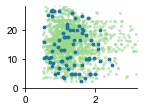

In [5]:
new_del_at_high05= list(del_at_high05) + ['W59V']
n= len(new_del_at_high05)

importlib.reload(pt)
# ta toxins
df_doub_del_high = df_doubles_d_h_ta.loc[df_doubles_d_h_ta.at_mut.isin(new_del_at_high05)]
df_doub_del_sig = df_doub_del_high.loc[(df_doub_del_high.neg_log_p_tail > 9) & (df_doub_del_high.mean_fit >0.5)]
#most toxic toxins
df_mt_del_high = df_doubles_d_h.loc[df_doubles_d_h.at_mut.isin(new_del_at_high05)]
df_mt_del_sig_high = df_mt_del_high.loc[(df_mt_del_high.neg_log_p_tail > 9) &(df_mt_del_high.mean_fit >0.5)]

pt.plot_d_vs_effect_bayes(df_doub_del_sig, df_mt_del_sig_high, xlim=[0,3.2],ylim=[0,28],    
                          labeling=False,
                          #col_ta = avb_cols['tur'],#avb_contrast_cols['p'],#avb_cols['tur'],
                          #col_mt = '#3d7c65', 
                            col_ta = '#99d98c',
                          col_mt = '#1a759f',
                          figsize=(2,1.5),       
                          s_mt=8,
                          s_ta=4,
                          fout= plot_out + 'scatter_d_efx_low_all_high_toxin.svg')


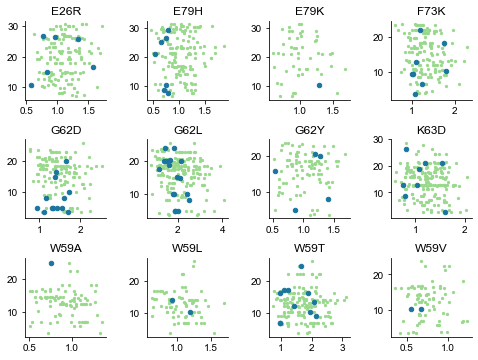

In [88]:

n_rows = int(np.ceil(np.sqrt(n)))
n_cols = n_rows

fig = plt.figure(figsize=(2 * n_cols, 2 * n_rows))
gs = gridspec.GridSpec(n_rows, n_cols)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

    
# ta toxins
for i in range(n):
    at=new_del_at_high05[i]
    df_doubles_d_h_ta_g62l = df_doubles_d_h_ta.loc[df_doubles_d_h_ta.at_mut == at]
    d_doubles_d_sig_h_g62l = df_doubles_d_h_ta_g62l.loc[(df_doubles_d_h_ta_g62l.neg_log_p_tail > 9) &(df_doubles_d_h_ta_g62l.mean_fit >0/5)]
    #most toxic toxins
    df_doubles_d_h_g62l = df_doubles_d_h.loc[df_doubles_d_h.at_mut == at]
    df_most_toxic_h_g62l = df_doubles_d_h_g62l.loc[(df_doubles_d_h_g62l.neg_log_p_tail > 9) &(df_doubles_d_h_g62l.mean_fit >0.5)]
    

    ax = plt.subplot(gs[i])

    #ta
    ax.scatter(d_doubles_d_sig_h_g62l.mean_fit,d_doubles_d_sig_h_g62l.min_atom_d, color='#99d98c', s=5)
    #mt
    ax.scatter(df_most_toxic_h_g62l.mean_fit,df_most_toxic_h_g62l.min_atom_d, color='#1a759f', s=20)
    plt.title(at)
    
plt.savefig(plot_out + 'scatter_all_at_high_toxin_low_at.svg', format='svg')

# Fig 4 examples

## Fig4B,C

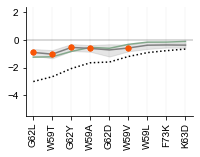

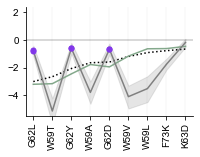

In [35]:
# plotting this only for deleterious few antitoxins

df_muts = pd.read_csv(plot_out + 'df_muts.csv', index_col=0)
df_muts['yobs_errors'] = [literal_eval(x) if str(x) != 'nan' else np.nan for x in df_muts['yobs_errors'] ] # conert to tuples
at_mut_to_num_bypos_low_trunc = dict([(k,v) for k,v in at_mut_to_num_bypos_low_all.items() if v<10])

col_double_expect = '#84a98c'
col_double='grey'

t_mut = 'V5L'

pt.plot_t_confidence_absolute(df_muts, 
                           t_mut, 
                           at_mut_to_num_bypos_low_trunc, 
                            df_resc = df_resc_low_mt,
                           ylim=[-5.5,2.4],
                           fout = plot_out + 'trunc_t_conf_abs_'+ t_mut,
                           xtick_size=10,
                            labeling=False,
                              col_sig_resc = non_spec_col,
                              plot_at_h_lines=True, 
                              col_double=col_double,
                              col_double_expect = col_double_expect,
                              col_at_single = 'black'
                              
                          )

t_mut = 'E73K'
pt.plot_t_confidence_absolute(df_muts,
                           t_mut, 
                           at_mut_to_num_bypos_low_trunc,
                            df_resc = df_resc_low_mt,
                           ylim=[-5.5,2.4],
                           fout = plot_out + 'trunc_t_conf_abs_'+ t_mut,
                           xtick_size=10,
                              labeling=False,
                              col_sig_resc = spec_col, 
                            plot_at_h_lines=True, 
                              col_double=col_double,
                                col_double_expect = col_double_expect,
                                col_at_single = 'black'



                          )

## fig 4E scatter

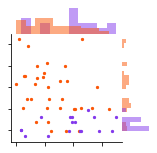

In [7]:
importlib.reload(pt)
pt.plot_rescue_scatter_d(df_merge_all_mt_l_1, labeling=False,
                         spec_col = spec_col,#'#0081a7', #'#e76f51',
                         global_col=non_spec_col,#'#871862', #avb_cols['tur'],
                         fout = plot_out + 'l_resc_epi1_distance_effect_mt')


In [252]:
len(set(df_merge_all_mt_l_1.loc[df_merge_all_mt_l_1.sig_epi == 0].t_mut))

23

In [227]:
len(set(df_merge_all_mt_l_1.loc[df_merge_all_mt_l_1.sig_epi == 1].t_mut))

11

In [231]:
len(set(df_merge_all_mt_l_1.t_mut))

32

In [254]:
len(set([t[:-1] for t in t_glob]))

15

# Suppl figure

21


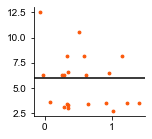

In [15]:
# plot a scatter of linear latent vs. distance

t_glob = [t for t in df_merge_all_mt_l_1.t_mut if t not in 
          df_merge_all_mt_l_1.loc[df_merge_all_mt_l_1.sig_epi == 1].t_mut.values]
print(len(set(t_glob)))

df_muts_singles['t_wtaa_pos_m0'] = df_muts_singles.t_mut.str[:-1]
df_muts_singles_min_d = df_muts_singles.merge(df_min_dist_t[['t_wtaa_pos_m0','min_atom_dist']], 
                                             left_on = 't_wtaa_pos_m0',
                                             right_on = 't_wtaa_pos_m0')

df_glob_min = df_muts_singles_min_d.loc[df_muts_singles_min_d.t_mut.isin(t_glob)]
plt.figure(figsize=(2,2))
plt.axhline(6, c='black')
plt.scatter(df_glob_min.linear_latent_from_wt, df_glob_min.min_atom_dist, color=non_spec_col, s=8)
plt.savefig(plot_out + 'linear_latent_vs_min_d_any_at.svg', format='svg')
plt.show()

In [230]:
df_plot = df_muts_delAT_sigT
df_swarm = df_plot.loc[df_plot.t_mut.isin(range_order)]
df_swarm_merged = df_swarm.merge(df_resc_low_mt,how ='outer', left_on = ['at_mut', 't_mut'], right_on = ['at_mut', 't_mut'])
df_swarm_merged['sig_resc'] = df_swarm_merged.neg_log_p_tail > 9
len(set(df_swarm_merged.t_mut))

32

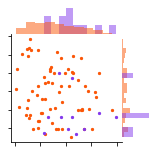

In [8]:
importlib.reload(pt)
pt.plot_rescue_scatter_d(df_merge_all_mt_h_1, labeling=False,
                         spec_col = spec_col,#'#0081a7', #'#e76f51',
                         global_col=non_spec_col,#'#871862', #avb_cols['tur'],
                         yticks=[0,5,10,15,20, 25,30],xticks=[0.5, 1,1.5,2,2.5],
                         fout = plot_out + 'l_resc_epi1_distance_effect_ta')


# distance of beneficial to any at residue

In [14]:
df_most_toxic_l = df_doubles_d_l.loc[(df_doubles_d_l.neg_log_p_tail > 9) & (df_doubles_d_l.mean_fit >0.5)]

toxic_aa_muts_m0 = df_all_mcs_toxic.loc[df_all_mcs_toxic['toxic_all']].index

df_merge_all_mt_l_1['t_wtaa_pos_m0'] = df_merge_all_mt_l_1.t_mut.str[:-1]
df_merge_all_mt_l_1_min_d_any = df_merge_all_mt_l_1.merge(df_min_dist_t[['t_wtaa_pos_m0','min_atom_dist']], 
                                                          left_on='t_wtaa_pos_m0', 
                                                          right_on = 't_wtaa_pos_m0', 
                                                          suffixes = ('','_any_at'))
df_merge_all_mt_l_1_min_d_any = df_merge_all_mt_l_1_min_d_any.rename(columns={'min_atom_dist': 'min_atom_d_any_at'})

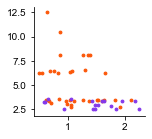

In [15]:

plt.figure(figsize=(2,2))
df_glob = df_merge_all_mt_l_1_min_d_any.loc[df_merge_all_mt_l_1_min_d_any.sig_epi == 0]
df_spec = df_merge_all_mt_l_1_min_d_any.loc[df_merge_all_mt_l_1_min_d_any.sig_epi == 1]

plt.scatter(df_glob.mean_fit_x, df_glob.min_atom_d_any_at, color=non_spec_col, s=8)

plt.scatter(df_spec.mean_fit_x, df_spec.min_atom_d_any_at, color=spec_col, s=8)
#plt.title('distance of beneficial T* to any AT atom')
plt.savefig(plot_out + 'min_dist_any_at.svg', format='svg')
plt.show()

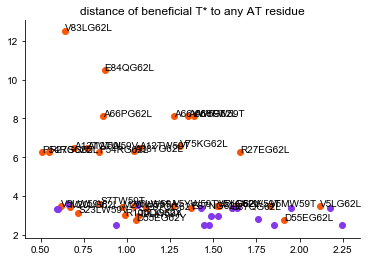

In [19]:


plt.figure()
df_glob = df_merge_all_mt_l_1_min_d_any.loc[df_merge_all_mt_l_1_min_d_any.sig_epi == 0]
df_spec = df_merge_all_mt_l_1_min_d_any.loc[df_merge_all_mt_l_1_min_d_any.sig_epi == 1]

plt.scatter(df_glob.mean_fit_x, df_glob.min_atom_d_any_at, color=non_spec_col)

for n, r in df_glob.iterrows():
    plt.text(r.mean_fit_x, r.min_atom_d_any_at, r.t_mut + r.at_mut)

plt.scatter(df_spec.mean_fit_x, df_spec.min_atom_d_any_at, color=spec_col)
plt.title('distance of beneficial T* to any AT residue')
plt.show()

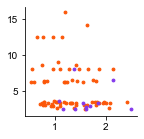

In [16]:
# for low at conditions
df_merge_all_mt_h_1['t_wtaa_pos_m0'] = df_merge_all_mt_h_1.t_mut.str[:-1]
df_merge_all_mt_h_1_min_d_any = df_merge_all_mt_h_1.merge(df_min_dist_t[['t_wtaa_pos_m0','min_atom_dist']], 
                                                          left_on='t_wtaa_pos_m0', right_on = 't_wtaa_pos_m0', suffixes = ('','_any_at'))
df_merge_all_mt_h_1_min_d_any = df_merge_all_mt_h_1_min_d_any.rename(columns={'min_atom_dist': 'min_atom_d_any_at'})

plt.figure(figsize=(2,2))
df_glob = df_merge_all_mt_h_1_min_d_any.loc[df_merge_all_mt_h_1_min_d_any.sig_epi == 0]
df_spec = df_merge_all_mt_h_1_min_d_any.loc[df_merge_all_mt_h_1_min_d_any.sig_epi == 1]

plt.scatter(df_glob.mean_fit_x, df_glob.min_atom_d_any_at, color=non_spec_col, s=8)

plt.scatter(df_spec.mean_fit_x, df_spec.min_atom_d_any_at, color=spec_col, s=8)
#plt.title('distance of beneficial T* to any AT atom')
plt.savefig(plot_out + 'min_dist_any_at_low_at.svg', format='svg')
plt.show()

# fig4F crystals grid

In [16]:
# this is plotting the specific vs general on xtal to show in paper
importlib.reload(pdbt)
pdbt.plot_grid_spec_gen(df_merge_all_sig_epi_grid_mt_l_1, del_at_low05, 'low_gen_spec_05resc_mt', 
                        at_del_col = '0xf5bb06',
                        spec_col = '0x'+spec_col[1:],
                        glob_col = '0x'+non_spec_col[1:],
                        labeling=False
                       )

# fig 4 bars

15 207
3 147
15 140
0 87
5 98
1 82
0 35
0 22
0 11


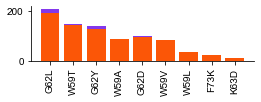

In [19]:
def plot_bar_spec_gen(df_merge2, at_order, fout=None,
                     global_col='#871862', 
                      spec_col ='#0081a7', labeling=True
                     ):
    x_ticks = []
    x_pos = []
    spec = []
    gen = []

    for i, at in enumerate(at_order):
        df_curr = df_merge2.loc[df_merge2.at_mut == at]
        num_spec = np.sum(df_curr.sig_epi)
        tot_ben = len(df_curr)
        gen_ben = tot_ben - num_spec
        print(num_spec, tot_ben)

        x_ticks.append(at)
        x_pos.append(i)
        spec.append(num_spec)
        gen.append(gen_ben)

    plt.figure(figsize=(4,1))
    plt.bar(x_pos, gen, color=global_col, label='non-specific rescue')
    plt.bar(x_pos, spec,bottom = gen, label='specific rescue', color=spec_col)

    if labeling:
        plt.legend()
        plt.ylabel('frequency')
        plt.xlabel('AT*')

    plt.xticks(x_pos, x_ticks, rotation='90')

    if fout != None:
        plt.savefig(fout+'.svg', format='svg')
        plt.savefig(fout+'.pdf', format='pdf')

    plt.show()
    
at_order = ['G62L', 'W59T', 'G62Y', 'W59A', 'G62D', 'W59V', 'W59L', 'F73K', 'K63D']


plot_bar_spec_gen(df_merge_all_sig_epi_grid_l_1.rename(columns={'spec':'sig_epi'}), 
                  at_order, 
                  spec_col = spec_col,
                  global_col = non_spec_col,
                  fout = plot_out + 'bar_char_chart_05', labeling=False)

In [153]:
len(del_at_high05)

Index(['E26R', 'E79H', 'E79K', 'F73K', 'G62D', 'G62L', 'G62Y', 'K63D', 'W59A',
       'W59L', 'W59T'],
      dtype='object')

In [152]:
del_at_low05

Index(['F73K', 'G62D', 'G62L', 'G62Y', 'K63D', 'W59A', 'W59L', 'W59T', 'W59V'], dtype='object')

In [151]:
len(at_order_high)

11

4 17
4 13
1 11
1 8
0 8
0 7
0 6
1 5
0 2
0 1
0 1
0 0


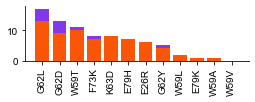

In [20]:
# for high toxin
at_order_high = ['G62L','G62D','W59T','F73K','K63D','E79H', 'E26R' , 'G62Y','W59L','E79K','W59A','W59V'] # 'E26R', is del, but not coevolving inter
plot_bar_spec_gen(df_merge_all_sig_epi_grid_mt_h_1.rename(columns={'spec':'sig_epi'}), 
                  at_order_high, 
                  spec_col = spec_col,
                  global_col = non_spec_col,
                  fout = plot_out + 'bar_char_chart_05_h',
                  labeling=False)

4 19
3 11
7 11
0 2
2 3
1 4
0 1
0 0
0 0


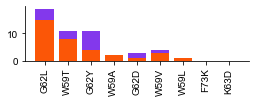

In [21]:
plot_bar_spec_gen(df_merge_all_sig_epi_grid_mt_l_1.rename(columns={'spec':'sig_epi'}), at_order, 
                  fout = plot_out + 'bar_char_chart_05_l_mt',
                  spec_col = spec_col,
                  global_col = non_spec_col,
                 labeling=False)

4 17
4 13
1 11
1 8
0 8
0 7
1 5
0 2
0 1
0 1
0 0


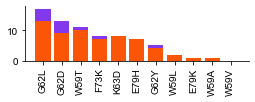

In [22]:
# high

at_order_high = ['G62L','G62D','W59T','F73K','K63D','E79H','G62Y','W59L','E79K','W59A','W59V' ]

plot_bar_spec_gen(df_merge_all_sig_epi_grid_mt_h_1.rename(columns={'spec':'sig_epi'}), at_order_high, 
                  fout = plot_out + 'bar_char_chart_05_h_mt',
                  spec_col = spec_col,
                  global_col = non_spec_col,
                 labeling=False)

8 198
9 141
3 172
3 166
0 196
0 148
2 98
1 76
0 52
0 87
0 0


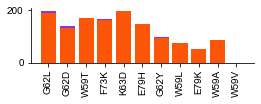

In [23]:
# high

at_order_high = ['G62L','G62D','W59T','F73K','K63D','E79H','G62Y','W59L','E79K','W59A','W59V' ]

plot_bar_spec_gen(df_merge_all_sig_epi_grid_h_1.rename(columns={'spec':'sig_epi'}), at_order_high, 
                  fout = plot_out + 'bar_char_chart_05_h_ta',
                  spec_col = spec_col,
                  global_col = non_spec_col,
                 labeling=False)

# absolute cutoffs and all beneficial

## fig 4D

{-2: (17, 28), -1.5: (16, 20), -1: (10, 10), -0.5: (3, 3)}


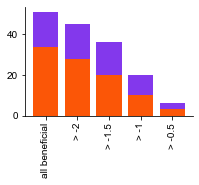

In [26]:
df_merge_abs_spec = df_merge_all_sig_epi_grid_mt_l_1.merge(df_muts, left_on = ['t_mut', 'at_mut'], right_on = ['t_mut', 'at_mut'])

cut_to_tup_spec_gen = {}
for cut in [-2,-1.5, -1, -0.5]:
    df_cut = df_merge_abs_spec.loc[df_merge_abs_spec.yobs_from_wt > cut]
    num_spec = sum(df_cut.spec)
    num_gen = len(df_cut) - num_spec
    cut_to_tup_spec_gen[cut] = (num_spec, num_gen)
print(cut_to_tup_spec_gen)

global_col=non_spec_col
spec_col =spec_col
plt.figure(figsize=(3,2))

x_vals = range(len(cut_to_tup_spec_gen)+1)

num_spec_all_ben = sum(df_merge_all_sig_epi_grid_mt_l_1.spec)
num_gen_all_ben = len(df_merge_all_sig_epi_grid_mt_l_1) - num_spec_all_ben
gen_vals = [num_gen_all_ben] + [t[1] for t in cut_to_tup_spec_gen.values()]
spec_vals = [num_spec_all_ben] + [t[0] for t in cut_to_tup_spec_gen.values()]

plt.bar(x_vals, gen_vals, color=global_col, label='non-specific rescue')
plt.bar(x_vals, spec_vals,bottom = gen_vals, label='specific rescue', color=spec_col)


plt.xticks(x_vals, ['all beneficial']+ ['> '+str(cut) for cut in cut_to_tup_spec_gen.keys()], rotation='90')
plt.savefig(plot_out + 'bar_plot_spec_gen.svg', format='svg')
plt.show()

In [27]:
df_merge_abs_spec_h = df_merge_all_sig_epi_grid_mt_h_1.merge(df_muts_h, left_on = ['t_mut', 'at_mut'], right_on = ['t_mut', 'at_mut'])

In [28]:
df_merge_abs_spec_h_no_e26r = df_merge_abs_spec_h.loc[df_merge_abs_spec_h.at_mut != 'E26R']

In [29]:
df_merge_all_sig_epi_grid_mt_h_1_no_e26r = df_merge_all_sig_epi_grid_mt_h_1.loc[df_merge_all_sig_epi_grid_mt_h_1.at_mut != 'E26R']

{-2: (9, 60), -1.5: (8, 50), -1: (7, 45), -0.5: (5, 34)}


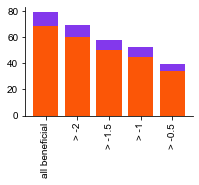

In [30]:

cut_to_tup_spec_gen_h = {}
for cut in [-2,-1.5, -1, -0.5]:
    df_cut = df_merge_abs_spec_h.loc[df_merge_abs_spec_h.yobs_from_wt > cut]
    #df_cut_gen = 
    num_spec = sum(df_cut.spec)
    num_gen = len(df_cut) - num_spec
    cut_to_tup_spec_gen_h[cut] = (num_spec, num_gen)
print(cut_to_tup_spec_gen_h)

spec_col = spec_col
global_col = non_spec_col
plt.figure(figsize=(3,2))
x_vals = range(len(cut_to_tup_spec_gen_h)+1)

num_spec_all_ben = sum(df_merge_all_sig_epi_grid_mt_h_1.spec)
num_gen_all_ben = len(df_merge_all_sig_epi_grid_mt_h_1) - num_spec_all_ben
gen_vals = [num_gen_all_ben] + [t[1] for t in cut_to_tup_spec_gen_h.values()]
spec_vals = [num_spec_all_ben] + [t[0] for t in cut_to_tup_spec_gen_h.values()]

plt.bar(x_vals, gen_vals, color=global_col, label='non-specific rescue')
plt.bar(x_vals, spec_vals,bottom = gen_vals, label='specific rescue', color=spec_col)


plt.xticks(x_vals, ['all beneficial']+ ['> '+str(cut) for cut in cut_to_tup_spec_gen_h.keys()], rotation='90')
plt.savefig(plot_out + 'bar_plot_spec_gen_h.svg', format='svg')
plt.show()

# fig 4A

In [32]:
# sorting by mean amount of rescue in deleterious ats
df_muts_h_del = df_muts_h.loc[df_muts_h.at_mut.isin(del_at_high05)]
df_muts_h_del['at_single'] =  df_muts_h_del.apply(lambda r: df_muts_h_del.loc[df_muts_h_del.muts == 'wtT:'+r['at_mut']].yobs_from_wt.values[0], axis=1)
df_muts_h_del

df_muts_h_del['resc'] = df_muts_h_del['yobs_from_wt'] - df_muts_h_del['at_single']

df_muts_h_mean_by_tmut = df_muts_h_del.groupby('t_mut').mean()
df_muts_h_resc_sort = df_muts_h_mean_by_tmut.sort_values(by='resc', ascending=False)
df_muts_h_resc_sort_mt= df_muts_h_resc_sort.loc[df_muts_h_resc_sort.index.isin(mt_toxins)]


# sorting by mean amount of rescue in deleterious ats, for low
df_muts_del = df_muts.loc[df_muts.at_mut.isin(del_at_low05)]
df_muts_del['at_single'] =  df_muts_del.apply(lambda r: df_muts_del.loc[df_muts_del.muts == 'wtT:'+r['at_mut']].yobs_from_wt.values[0], axis=1)


df_muts_del['resc'] = df_muts_del['yobs_from_wt'] - df_muts_del['at_single']

df_muts_mean_by_tmut = df_muts_del.groupby('t_mut').mean()
df_muts_resc_sort = df_muts_mean_by_tmut.sort_values(by='resc', ascending=False) # sorted by the mean rescue acrodd different backgrounds.
df_muts_resc_sort_mt= df_muts_resc_sort.loc[df_muts_resc_sort.index.isin(mt_toxins)]


# get all toxin mutants which are rescuing in at least one background, and all the positive global effects

# positibe global 
wt_linear_latent = df_muts_singles.loc[df_muts_singles.muts == 'wtT:wtAT'].linear_latent.values[0]
df_muts_singles_mt['linear_latent_from_wt'] = df_muts_singles_mt.linear_latent - wt_linear_latent
df_global_toxins = df_muts_singles_mt.loc[df_muts_singles_mt.linear_latent_from_wt > 0]
global_toxins = set(df_global_toxins.t_mut)

#significant rescues
sig_rescue_t = set(df_resc_low_mt.t_mut)

all_bene_t = global_toxins.union(sig_rescue_t)
print('all bene t', len(all_bene_t))
# then sorted by their average rescue
print(len(del_at_low05))
df_muts_delAT_benT = df_muts.loc[(df_muts.at_mut.isin(del_at_low05)) &(df_muts.t_mut.isin(list(all_bene_t) + ['wtT']))]


# get at single effect
df_muts_delAT_benT['at_single'] =  df_muts_delAT_benT.apply(lambda r: df_muts_delAT_benT.loc[df_muts_delAT_benT.muts == 'wtT:'+r['at_mut']].yobs_from_wt.values[0], axis=1)


df_muts_delAT_benT['resc'] = df_muts_delAT_benT['yobs_from_wt'] - df_muts_delAT_benT['at_single']

df_muts_delAT_benT_mean_by_tmut = df_muts_delAT_benT.groupby('t_mut').mean()
df_muts_delAT_benT_resc_sort = df_muts_delAT_benT_mean_by_tmut.sort_values(by='linear_latent_from_wt', ascending=False) # sorted by the mean rescue acrodd different backgrounds.
df_muts_delAT_benT_resc_sort_mt= df_muts_delAT_benT_resc_sort.loc[df_muts_delAT_benT_resc_sort.index.isin(mt_toxins)]


# only plotting this for significant rescue toxins
print(len(sig_rescue_t))


df_muts_delAT_sigT = df_muts.loc[(df_muts.at_mut.isin(del_at_low05)) &(df_muts.t_mut.isin(list(sig_rescue_t) + ['wtT']))]
df_muts_delAT_sigT

for n,r in df_muts_delAT_sigT.iterrows():
    at_single_r = df_muts_delAT_sigT.loc[df_muts_delAT_sigT.muts == 'wtT:'+r['at_mut']]
    #print(at_single_r)
    
    
# get at single effect
df_muts_delAT_sigT['at_single'] =  df_muts_delAT_sigT.apply(
    lambda r: df_muts_delAT_sigT.loc[df_muts_delAT_sigT.muts == 'wtT:'+r['at_mut']].yobs_from_wt.values[0], axis=1)


df_muts_delAT_sigT['resc'] = df_muts_delAT_sigT['yobs_from_wt'] - df_muts_delAT_sigT['at_single']

df_muts_delAT_sigT_mean_by_tmut = df_muts_delAT_sigT.groupby('t_mut').mean()
df_muts_delAT_sigT_resc_sort = df_muts_delAT_sigT_mean_by_tmut.sort_values(by='linear_latent_from_wt', ascending=False) # sorted by the mean rescue acrodd different backgrounds.
df_muts_delAT_sigT_resc_sort_mt= df_muts_delAT_sigT_resc_sort.loc[df_muts_delAT_sigT_resc_sort.index.isin(mt_toxins)]

## calculating residuals for each toxin rescuing mutant
df_muts_delAT_sigT['res'] = df_muts_delAT_sigT.yobs_from_wt - df_muts_delAT_sigT.yhat_from_wt


df_max_res = df_muts_delAT_sigT.groupby('t_mut').max()
df_min_res = df_muts_delAT_sigT.groupby('t_mut').min()
df_merge = df_max_res.merge(df_min_res, left_index=True, right_index=True, suffixes={'_max','_min'})
df_merge['range'] = df_merge.res_max - df_merge.res_min

# sorting by range of residuals from indepenent from independent prediction

df_merge_sort = df_merge.sort_values('range', ascending=False)
range_order_min_up = list(v for v in df_merge_sort.index if v!='wtT')
range_order = range_order_min_up[::-1]

#
t_mut_latent = np.array([df_muts_singles.loc[df_muts_singles.t_mut== t_mut].linear_latent_from_wt.values[0] for t_mut in range_order])
max_val = max(np.abs(t_mut_latent))


2103_read_ec_files.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
2103_read_ec_files.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #########################################################################################
2103_read_ec_files.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

all bene t 94
9


2103_read_ec_files.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
2103_read_ec_files.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


32


2103_read_ec_files.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  '''
2103_read_ec_files.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs = ['015', '02', '03', '04', '05', '06', '07', '08', '09']
2103_read_ec_files.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

sig epi and sig beneficial pairs 17
t* with any beneficial 32 
 t* with at least one sig epi beneficial 11


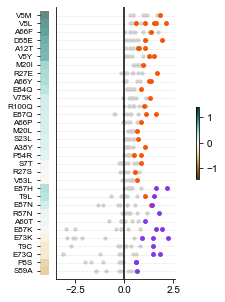

In [34]:



def plot_swarm(df_swarm_merged, df_muts_delAT_sigT, t_order,
               x_col = 'res', 
               fout = plot_out + 't_range_orfer_sigt_swarm_barunder2_test', 
               spec_col = '#0081a7', 
               non_spec_col = '#871862', 
               non_resc_col = avb_cols['tur'], 
               cmap_n = 'bwr'
              ):
    # x_col == res --> epistasis
    # x_col == resc ==> beneficial effect
    
    if x_col == 'res':
        middle_line_col = 'orange'
        xlabel= 'epistasis'
    elif x_col == 'resc':
        middle_line_col = 'black'
        xlabel= 'delta GR'  
        
    fig=plt.figure(figsize=(3,5))
    # create grid for different subplots 
    spec = gridspec.GridSpec(ncols=3, nrows=1, 
                             width_ratios=[1,5,1], wspace=0, 
                             hspace=0, height_ratios=[1]) 

    # plot swarm plot
    ax = fig.add_subplot(spec[1]) 
    # plot only df_swarm that are not significant rescues
    df_swarm_merged_no_resc = df_swarm_merged.loc[~df_swarm_merged.sig_resc]


    # the zero line for independent expectation
    ax.axvline(0, color=middle_line_col)

    # create dic t_mut to y position
    t_mut_to_i = dict(
        zip(
            list(t_order), 
            list(range(len(t_order)))
        ))
    #plot non-rescuing
    for n,r in df_swarm_merged_no_resc.iterrows():
        y_plot = t_mut_to_i[r.t_mut]
        x_val = df_muts_delAT_sigT.loc[df_muts_delAT_sigT.muts==r.t_mut + ':'+r.at_mut][x_col].values[0]
        ax.scatter( x_val,y_plot, color=non_resc_col, s=10)


    # add specific or general rescue
    for n,r in df_merge_all_sig_epi_grid_mt_l_1.iterrows():
        y_plot = t_mut_to_i[r.t_mut]
        x_val = df_muts_delAT_sigT.loc[df_muts_delAT_sigT.muts==r.t_mut + ':'+r.at_mut][x_col].values[0]
        #print(y_plot, x_val)
        if r.spec:
            col = spec_col
        else:
            col = non_spec_col
        ax.scatter( x_val,y_plot, color=col, s=15)

    t_latent_vals = np.array([df_muts_singles.loc[df_muts_singles.t_mut== t_mut].linear_latent_from_wt.values[0] for t_mut in t_order])
    # add a line so that individual rows can be seen better
    for i in range(len(t_latent_vals)):
        ax.axhline(i-0.05, color='black', alpha=0.1, lw=0.5)

    #ax.set_xlabel(xlabel)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_ylabel('')

    ax.set_ylim(-1,len(t_order))


    # plot the linear latent vcalues
    ax0 = fig.add_subplot(spec[0]) 
    max_val = max(np.abs(t_latent_vals))

    pos = ax0.imshow(t_latent_vals.reshape(-1,1), cmap=cmap_n, vmin=-max_val, vmax=max_val, alpha=0.6)
    ax0.set_xticks([])
    ax0.set_ylim(ax.get_ylim())
    ax0.set_yticks(range(len(t_order)))
    ax0.set_yticklabels(t_order, size=8)
    ax0.set_frame_on(False)
    #ax0.set_ylabel('T*')

    # plot colorbar
    ax_bar = fig.add_subplot(spec[2])
    fig.colorbar(pos, ax=fig.add_subplot(ax_bar))
    ax_bar.axis('off')

    plt.savefig(fout+'.pdf', format='pdf')
    plt.savefig(fout +'.svg', format='svg')
    plt.show()


# order by has specific or not, and then by linear latent value.

# adding to df swarm whether the rescue is epistatic or not
def get_sig_epi(df_epi, at_mut, t_mut):
    
    epi_val = df_epi.loc[(df_epi.t_mut == t_mut)&(df_epi.at_mut == at_mut)].spec
    if not epi_val.empty:
        return epi_val.values[0]
    else:
        return 0


df_plot = df_muts_delAT_sigT
df_swarm = df_plot.loc[df_plot.t_mut.isin(range_order)]
df_swarm_merged = df_swarm.merge(df_resc_low_mt,how ='outer', left_on = ['at_mut', 't_mut'], right_on = ['at_mut', 't_mut'])
df_swarm_merged['sig_resc'] = df_swarm_merged.neg_log_p_tail > 9

df_swarm_merged['sig_epi'] = df_swarm_merged.apply(
    lambda r: 
    get_sig_epi(df_merge_all_sig_epi_grid_mt_l_1, r.at_mut, r.t_mut),axis=1)


t_with_epi = set(df_swarm_merged.loc[df_swarm_merged.sig_epi.astype(bool)].t_mut)

# order by latent
t_mut_latent = np.array([df_muts_singles.loc[df_muts_singles.t_mut== t_mut].linear_latent_from_wt.values[0] for t_mut in range_order])
df_t_mut_latent_sort = df_muts_singles.loc[df_muts_singles.t_mut.isin(range_order)].sort_values(by='linear_latent_from_wt')
t_order_latent = df_t_mut_latent_sort.t_mut

t_with_epi_ordered = [t for t in t_order_latent if t in t_with_epi]
t_without_epi_ordered = [t for t in t_order_latent if t not in t_with_epi]

t_all_order =  t_with_epi_ordered + t_without_epi_ordered
print('sig epi and sig beneficial pairs',sum(df_swarm_merged.sig_epi))

print('t* with any beneficial {} \n t* with at least one sig epi beneficial {}'.format(len(t_all_order), len(t_with_epi)))

plot_swarm(df_swarm_merged, df_muts_delAT_sigT, t_all_order, x_col='resc',    
           spec_col = spec_col, 
               non_spec_col = non_spec_col, 
               non_resc_col = 'lightgrey',
           cmap_n='BrBG',
           fout = plot_out + 'swarm_mt_l_latent_gr_spec_nonspec')

# supplementary correlate high low

(0.9789318516532232, 0.0)


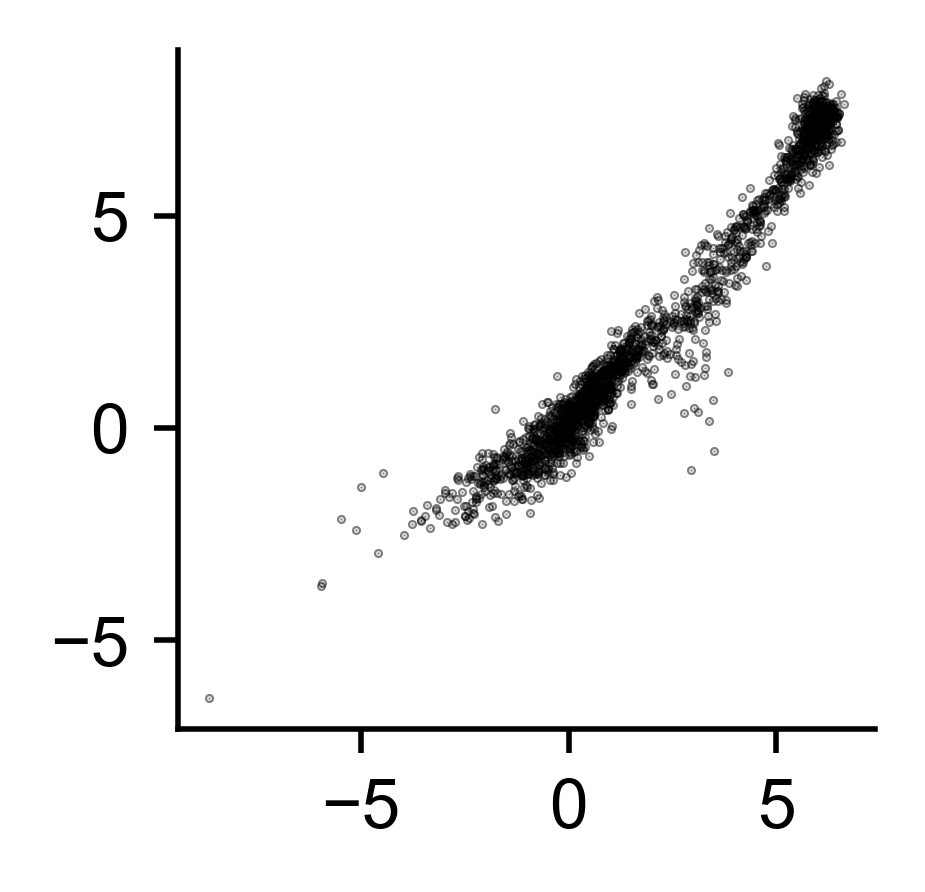

In [66]:
plt.figure(figsize=(1.8,1.8), dpi=500)
plt.scatter(df_muts_both_singles.linear_latent_from_wt_l, df_muts_both_singles.linear_latent_from_wt_h, s=0.1, alpha=0.5, color='black')
print(st.pearsonr(df_muts_both_singles.linear_latent_from_wt_l, df_muts_both_singles.linear_latent_from_wt_h))
#plt.xlabel('linear latent, low conc')
#plt.ylabel('linear latent high conc')
plt.xticks(size=10)
plt.yticks(size=10)

plt.savefig(plot_out + 'corr_latent_independent.jpeg', format='jpeg', quality=100)
plt.show()

(0.5004410707142235, 1.6542443159341513e-131)


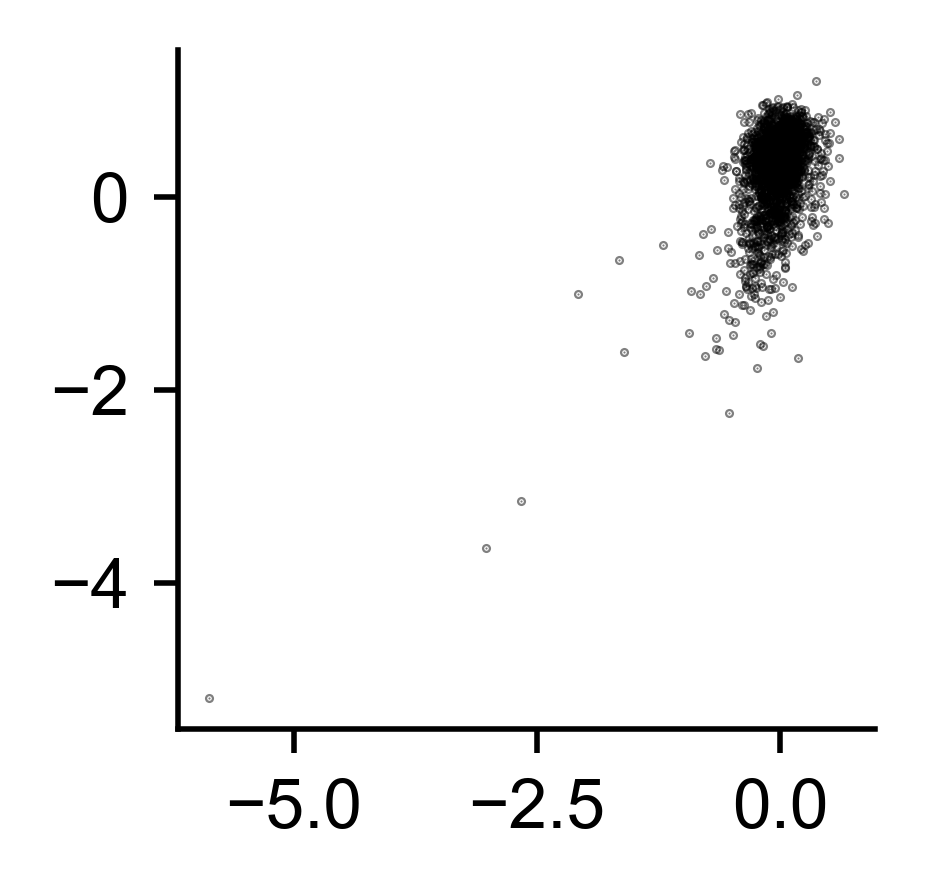

In [67]:
plt.figure(figsize=(1.8,1.8), dpi=500)
plt.scatter(df_muts_both_singles.yobs_from_wt_l, df_muts_both_singles.yobs_from_wt_h, s=0.1, alpha=0.5, color='black')
print(st.pearsonr(df_muts_both_singles.yobs_from_wt_l, df_muts_both_singles.yobs_from_wt_h))
#plt.xlabel('delta GR, low conc')
#plt.ylabel('delta GR, high conc')
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig(plot_out + 'corr_yobs_independent.jpeg', format='jpeg', quality=100)
plt.show()

(0.38587406347696146, 0.0)


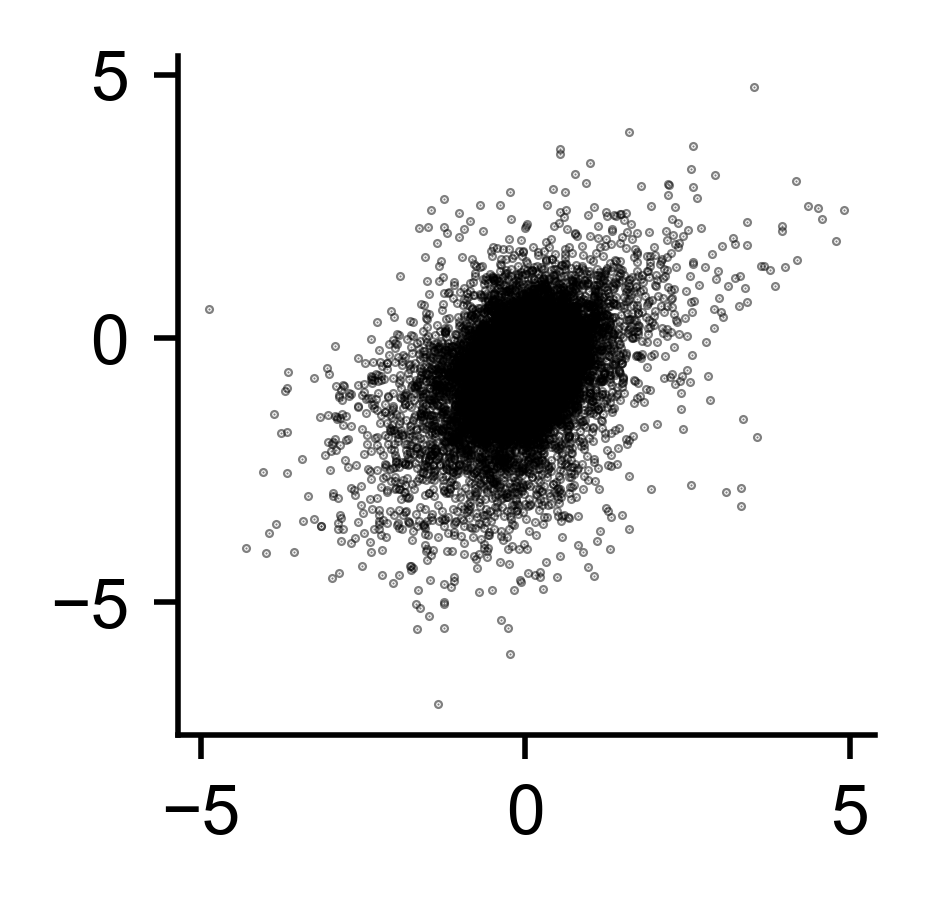

In [68]:

plt.figure(figsize=(1.8, 1.8), dpi=500)
plt.scatter(df_muts_both.resid_l, df_muts_both.resid_h, s=0.1, alpha=0.5, color='black')
print(st.pearsonr(df_muts_both.resid_l, df_muts_both.resid_h))
#plt.xlabel('epistasis low conc')
#plt.ylabel('epistasis high conc')
plt.xticks(size=10)
plt.xticks(size=10)

plt.savefig(plot_out + 'corr_epistasis.jpeg', format='jpeg', quality=100)
plt.show()


(0.34560747938731046, 4.610964922803017e-58)


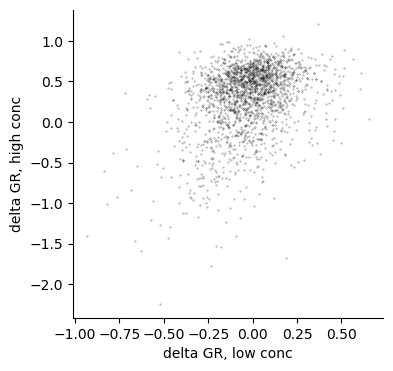

In [452]:

plt.figure(figsize=(4,4))
plt.scatter(df_muts_wt_at.yobs_from_wt_l, df_muts_wt_at.yobs_from_wt_h, s=0.1, alpha=0.5, color='black')
print(st.pearsonr(df_muts_wt_at.yobs_from_wt_l, df_muts_wt_at.yobs_from_wt_h))
plt.xlabel('delta GR, low conc')
plt.ylabel('delta GR, high conc')
plt.savefig(plot_out + 'corr_yobs_all_wtat.pdf', format='pdf')
plt.show()

# suppl. fig 4 nonlinearity + residuals

In [56]:
df_muts_epi_merge = df_muts.merge(df_all_epi_l, left_on = ['t_mut', 'at_mut'], right_on=['t_mut', 'at_mut'])
df_muts_epi_merge_sig_epi_pos = df_muts_epi_merge.loc[(df_muts_epi_merge.neg_log_p_epi_tail >9) & (df_muts_epi_merge.resid >1)]
df_muts_epi_merge_sig_epi_neg = df_muts_epi_merge.loc[(df_muts_epi_merge.neg_log_p_epi_tail >9) & (df_muts_epi_merge.resid <-1)]
print(df_muts_epi_merge_sig_epi_pos.shape)
print(df_muts_epi_merge_sig_epi_neg.shape)

(215, 24)
(373, 24)


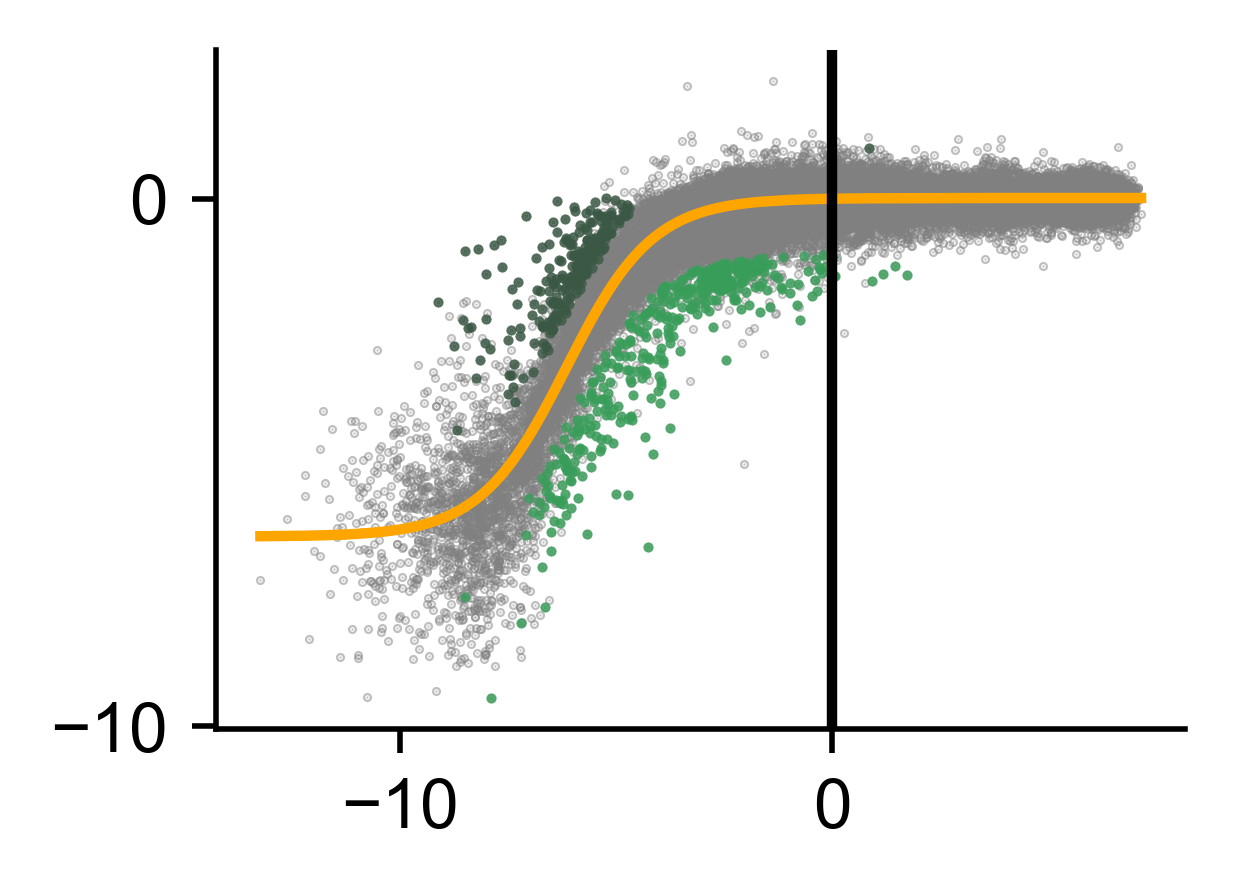

In [59]:
pos_epi_col = '#3a5843'
neg_epi_col = '#399e5a'

plt.figure(figsize=(2.5, 1.8), dpi=500)

#plot all
plt.scatter(df_muts.linear_latent_from_wt, df_muts.yobs_from_wt, s=0.1, alpha=0.5, c='grey')#avb_cols['tur'])

#plot positive epistatic
plt.scatter(df_muts_epi_merge_sig_epi_pos.linear_latent_from_wt, df_muts_epi_merge_sig_epi_pos.yobs_from_wt, 
            s=0.2, alpha=0.8, marker='X', c=pos_epi_col)

#plot negative epistatic
plt.scatter(df_muts_epi_merge_sig_epi_neg.linear_latent_from_wt, df_muts_epi_merge_sig_epi_neg.yobs_from_wt, 
            s=0.2, alpha=0.8,marker='X', c=neg_epi_col)

#plot expectation
tups = sorted(list(zip(df_muts.linear_latent_from_wt, df_muts.yhat_from_wt)), key=lambda x: x[0])
plt.plot([t[0] for t in tups], [t[1] for t in tups], label='expectation', color='orange')

plt.xticks([-10,0])
plt.yticks([-10,0])
plt.yticks(size=10)
plt.xticks(size=10)


plt.axvline(0, color='black')

plt.savefig(plot_out + 'latent_vs_y_no_lab'+'.jpeg', format='jpeg', quality=100)
#plt.show()

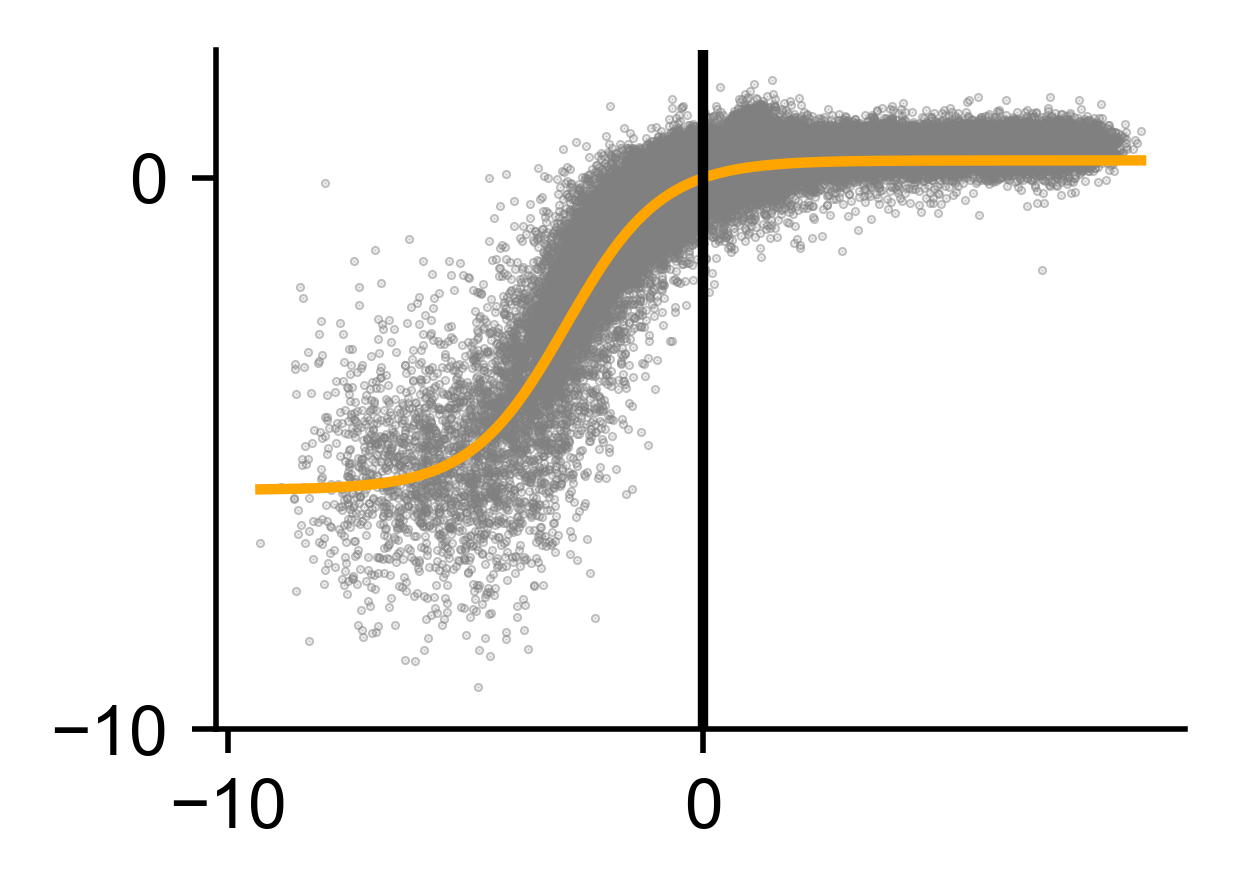

In [60]:
# for the high
pos_epi_col = '#3a5843'
neg_epi_col = '#399e5a'

plt.figure(figsize=(2.5, 1.8), dpi=500)

#plot all
plt.scatter(df_muts_h.linear_latent_from_wt, df_muts_h.yobs_from_wt, s=0.1, alpha=0.5, c='grey')#avb_cols['tur'])

#plot expectation
tups = sorted(list(zip(df_muts_h.linear_latent_from_wt, df_muts_h.yhat_from_wt)), key=lambda x: x[0])
plt.plot([t[0] for t in tups], [t[1] for t in tups], label='expectation', color='orange')

plt.axvline(0, color='black')

plt.xticks([-10,0])
plt.yticks([-10,0])
plt.yticks(size=10)
plt.xticks(size=10)

plt.savefig(plot_out + 'latent_vs_y_no_lab_h'+'.jpeg', format='jpeg', quality=100)


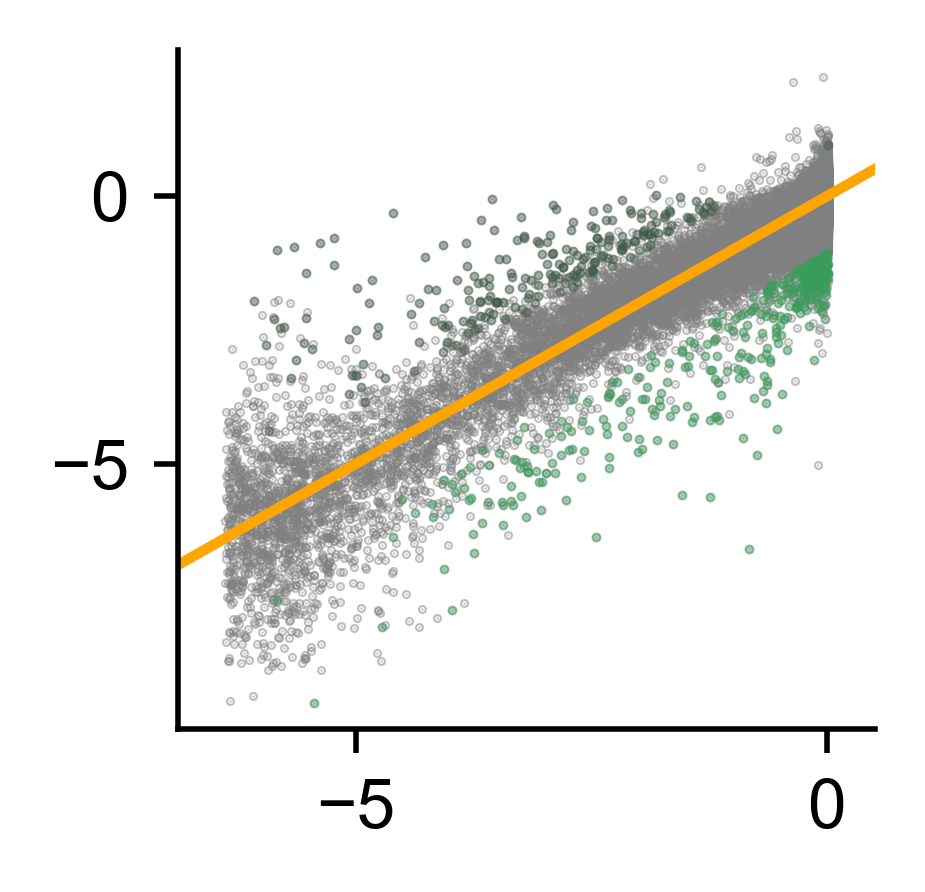

In [61]:

plt.figure(figsize=(1.8,1.8), dpi=500)

#plot all
plt.scatter(df_muts.yhat_from_wt, df_muts.yobs_from_wt, s=0.1, alpha=0.5, c='grey')#avb_cols['tur'])

#plot positive epistatic
plt.scatter(df_muts_epi_merge_sig_epi_pos.yhat_from_wt, df_muts_epi_merge_sig_epi_pos.yobs_from_wt, 
            s=0.2, alpha=0.45, c=pos_epi_col)

#plot negative epistatic
plt.scatter(df_muts_epi_merge_sig_epi_neg.yhat_from_wt, df_muts_epi_merge_sig_epi_neg.yobs_from_wt, 
            s=0.2, alpha=0.45,c=neg_epi_col)

plt.plot([-7,1], [-7,1], c='orange')

X = df_muts.yhat_from_wt
Y = df_muts.yobs_from_wt
plt.xlim(min(X)-0.5, max(X)+0.5)
plt.ylim(min(Y)-0.5, max(Y)+0.5)
plt.xticks([-5,0])
plt.yticks(size=10)
plt.xticks(size=10)


plt.savefig(plot_out + 'nonlinear_prediction_epi' +'.jpeg', format='jpeg', quality=100)

plt.show()

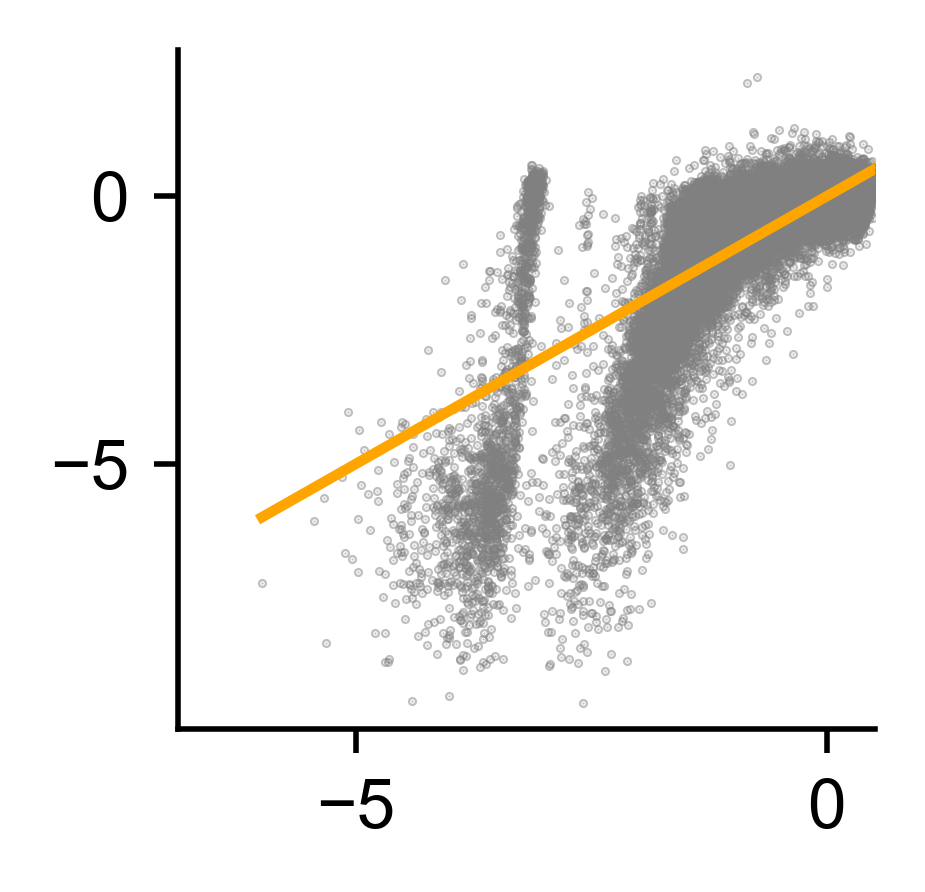

In [63]:

plt.figure(figsize=(1.8,1.8), dpi=500)

#plot all
plt.scatter(df_muts.ols, df_muts.yobs, s=0.1, alpha=0.5, c='grey')#avb_cols['tur'])


plt.plot([-6,1], [-6,1], c='orange')

X = df_muts.yhat_from_wt
Y = df_muts.yobs_from_wt
plt.xlim(min(X)-0.5, max(X)+0.5)
plt.ylim(min(Y)-0.5, max(Y)+0.5)
plt.xticks([-5,0])
plt.yticks(size=10)
plt.xticks(size=10)


plt.savefig(plot_out + 'linear_prediction' +'.jpeg', format='jpeg', quality=100)

plt.show()

# suppl fig independent toxin values

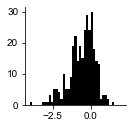

In [17]:
plt.figure(figsize=(1.8,1.8))
#plt.subplots_adjust(hspace=1, wspace=1)

bins= np.linspace(-4,2,40)

plt.hist(df_muts_singles_mt.linear_latent_from_wt.astype(float), color='black', bins=bins)
plt.yticks(size=10)
plt.xticks(size=10)

plt.savefig(plot_out + 'distribution_mt_toxin_latent.svg', format='svg')

# double mutant cycle on the nonlinearity

## suppl fig doubel mutant cycle W59V-A60M

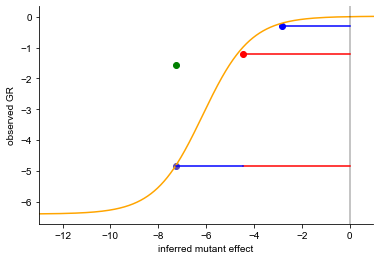

In [60]:
importlib.reload(pt)

pt.plot_double_muts_nonlinear(df_muts, at_mut = 'W59V', t_mut = 'A60M', fout=plot_out + 'nonlinear_double_a60m_w59v', xlim=[-13,1])

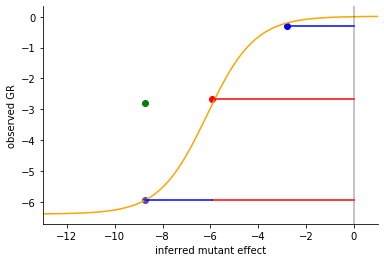

In [312]:
importlib.reload(pt)

pt.plot_double_muts_nonlinear(df_muts, at_mut = 'W59T', t_mut = 'A60M', fout=plot_out + 'nonlinear_double_a60m_w59T', xlim=[-13,1])

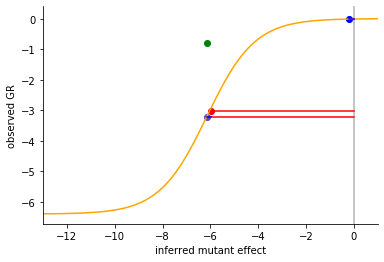

In [316]:
pt.plot_double_muts_nonlinear(df_muts, at_mut = 'G62L', t_mut = 'E73K', fout=plot_out + 'nonlinear_double_g63l_e73k', xlim=[-13,1])

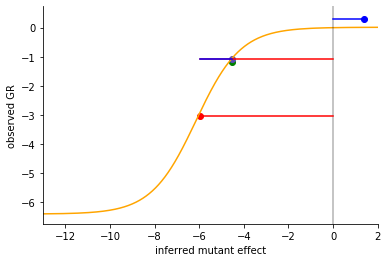

In [318]:
pt.plot_double_muts_nonlinear(df_muts, at_mut = 'G62L', t_mut = 'V5M', fout=plot_out + 'nonlinear_double_g63l_v5m', xlim=[-13,2])